**EJERCICIO N2**

Con siguiente dataset
```
# https://www.kaggle.com/datasets/vinitdesai564/cats-dogs-classification-dataset
```
Determinar si una imagen es Perro O Gato


---
Integrantes:

Paul Caihuara Caba

Gavino Abdel Gonzales Calle

Marcelo Fernando Condori Mendoza





Una vez descargado dataset, se procede a clasificar los dataset

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [4]:
#estamos preprocesando el conjunto de entrenamiento
#rescale: para normalizaar los valores
#0.2 shear_range, es pare mejorar la robuztes del modelo
# zoom_range:0.2 la aleatoridad de los mode.los

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [5]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: test_data/cats/00tb-cats1-videoSixteenByNineJumbo1600.jpg  
  inflating: test_data/cats/03_Holding-cat-inside-a-mosque-500x375.jpg  
  inflating: test_data/cats/07CAT-STRIPES-mediumSquareAt3X-v2.jpg  
  inflating: test_data/cats/1200px-Cat_August_2010-4.jpg  
  inflating: test_data/cats/121423_mr_cat_fetch_feat.jpg  
  inflating: test_data/cats/12cli-cats-videoSixteenByNine3000.jpg  
  inflating: test_data/cats/220726-cat-theo-elise-ew-636p-6cd3b0.jpg  
  inflating: test_data/cats/220805-domestic-cat-mjf-1540-382ba2.jpg  
  inflating: test_data/cats/2AE14CDD-1265-470C-9B15F49024186C10_source.jpg  
  inflating: test_data/cats/32665E6F-8D90-4567-9769D59E11DB7F26_source.jpg  
  inflating: test_data/cats/51_afi_article1_the-secret-language-of-cats.png  
  inflating: test_data/cats/52-A-CAT-copy-1200x1690.jpg  
  inflating: test_data/cats/75552.jpg  
  inflating: test_data/cats/800px-Feral_cat_Virginia_crop.jpg  
  inflating: test_data/cats/800px-

In [6]:
#ahora vamos a trabajar con los datos de entrenamiento
#esto hace procesamiento en lotes, de una carpeta
# target_size: redimensiona todas las imagenes , todas la pasa
# luego procesa las imagenes de 32 en 32
# class_mode:
training_set = train_datagen.flow_from_directory('/content/test_data/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/test_data/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 237 images belonging to 2 classes.
Found 237 images belonging to 2 classes.


In [7]:
#Establece para normalizar en un rango
test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
#hasta esta parte se aplicó preprocesamiento
#ahora se procede a la creación de la red neuronal
cnn = tf.keras.models.Sequential()
#aqui convulcionamos en 3 capas
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [9]:
#luego añadimos otra capa convuncional, hacemos agrupamiento
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
#max pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
#aqui hacemos el aplanamiento el matriz de 2 x 2 .. lo pasamos a un red unidimiencional
cnn.add(tf.keras.layers.Flatten()) #aplanamiento de matriz de 2x2
#aqui generamos la conexion , se añade un numero de neuronas
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #esto es un capa de salida con un solo neurona

In [11]:
# Posteriormente se aplica el entrenamiento de la red neuronal convolucional
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Además se confirma si los datasets están vacíos
print("Length of training_set:", len(training_set))
print("Length of test_set:", len(test_set))



Length of training_set: 8
Length of test_set: 8


In [12]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
8/8 [==============================] - 20s 2s/step - loss: 0.7149 - accuracy: 0.4810 - val_loss: 0.6838 - val_accuracy: 0.5105
Epoch 2/25
8/8 [==============================] - 14s 2s/step - loss: 0.6894 - accuracy: 0.5105 - val_loss: 0.6747 - val_accuracy: 0.5949
Epoch 3/25
8/8 [==============================] - 14s 2s/step - loss: 0.6718 - accuracy: 0.6034 - val_loss: 0.6470 - val_accuracy: 0.6667
Epoch 4/25
8/8 [==============================] - 17s 2s/step - loss: 0.6254 - accuracy: 0.6582 - val_loss: 0.6965 - val_accuracy: 0.5527
Epoch 5/25
8/8 [==============================] - 19s 2s/step - loss: 0.6696 - accuracy: 0.5654 - val_loss: 0.5863 - val_accuracy: 0.7384
Epoch 6/25
8/8 [==============================] - 15s 2s/step - loss: 0.5875 - accuracy: 0.6793 - val_loss: 0.5652 - val_accuracy: 0.6920
Epoch 7/25
8/8 [==============================] - 14s 2s/step - loss: 0.5643 - accuracy: 0.7089 - val_loss: 0.5466 - val_accuracy: 0.7131
Epoch 8/25
8/8 [==================

In [13]:
#Trabajamos con Numpy y Keras
import numpy as np
from keras.preprocessing import image

In [14]:
#se tiene que dar un foto en particular
test_image = image.load_img('/content/test_data/dogs/02-08-23_BLOG_WHAT_TO_FEED_DOGS_IN_HOT_WEATHER_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image) # convertimos la imagen en matriz de numpy
test_image = np.expand_dims(test_image, axis = 0) # esta parte para trabajar en lotes

In [15]:
#Ejecución de la predicción
result = cnn.predict(test_image)
training_set.class_indices

1/1 [==============================] - 0s 110ms/step


{'cats': 0, 'dogs': 1}

In [16]:
#Aquí se aplica la clasificación esperada
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

dog


# **Pruebas con imágenes externas conseguida de internet**

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

1/1 [==============================] - 0s 22ms/step
cat


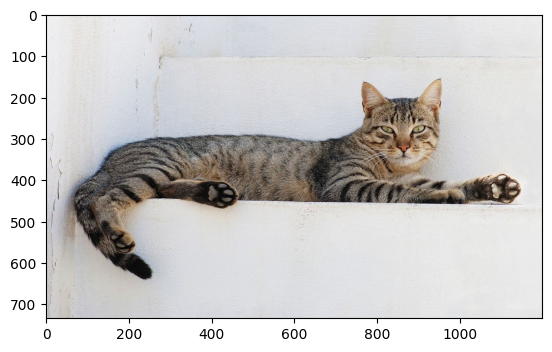

In [20]:
#se tiene que dar un foto en particular
image_path = '/content/ImagenesManuales/Cat_August_2010-4.jpg'
test_image = image.load_img(image_path, target_size = (64, 64))
test_image = image.img_to_array(test_image) #convertimos la imagen en matriz de numpy
test_image = np.expand_dims(test_image, axis = 0) #esto para trabajar en lotes

#hacemos la prediccion
result = cnn.predict(test_image)
training_set.class_indices

#aqui clasificamos
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 55ms/step
dog


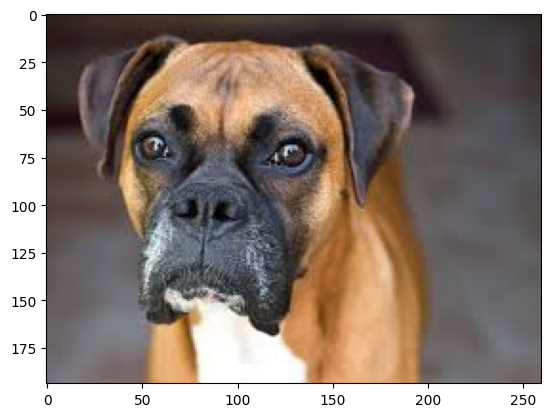

In [21]:
#se tiene que dar un foto en particular
image_path = '/content/ImagenesManuales/image_Boxer.jpg'
test_image = image.load_img(image_path, target_size = (64, 64))
test_image = image.img_to_array(test_image) #convertimos la imagen en matriz de numpy
test_image = np.expand_dims(test_image, axis = 0) #esto para trabajar en lotes

#hacemos la prediccion
result = cnn.predict(test_image)
training_set.class_indices

#aqui clasificamos
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()